<a href="https://colab.research.google.com/github/TEJASWINI-r228/Courseratest/blob/main/INTERNSHIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Computed top 3 cuisines and their percentages of restaurants serving them
['North Indian', 'Chinese', 'Fast Food']
[41.46162705 28.61480473 20.79363417]


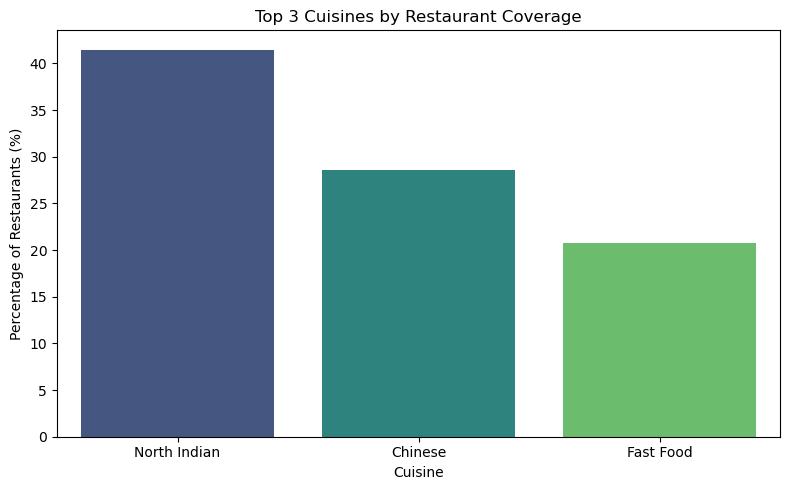

In [ ]:
#LEVEL1 DATA ANALYSIS TASKS
# Task 1: Top 3 cuisines and their percentages with a simple bar plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df_dataset3 exists from earlier steps
# If not, user should load it before running these cells.
df = pd.read_csv('OneDrive/Desktop/jupyter/Dataset  (1).csv')

# Compute top cuisines
cuisine_counts = df['Cuisines'].dropna().str.split(',').explode().str.strip().value_counts()
restaurant_total = len(df)

# Take top 3 and compute percentage of restaurants serving
# Note: Percentage here is share of restaurants that list the cuisine at least once
cuisine_presence = df.copy()
cuisine_presence['Cuisines_list'] = cuisine_presence['Cuisines'].fillna('').str.split(',').apply(lambda x: [s.strip() for s in x if s.strip() != ''])

all_cuisines = cuisine_counts.index.tolist()

presence_counts = {}
for c in all_cuisines:
    presence_counts[c] = cuisine_presence['Cuisines_list'].apply(lambda lst: c in lst).sum()

presence_series = pd.Series(presence_counts).sort_values(ascending=False)

top3_presence = presence_series.head(3)
top3_pct = (top3_presence / restaurant_total) * 100

# Display brief results and plot
print('Computed top 3 cuisines and their percentages of restaurants serving them')
print(top3_presence.index.tolist())
print(top3_pct.values)

plt.figure(figsize=(8,5))
sns.barplot(x=top3_presence.index, y=top3_pct.values, hue=top3_presence.index, palette='viridis', legend=False)
plt.ylabel('Percentage of Restaurants (%)')
plt.xlabel('Cuisine')
plt.title('Top 3 Cuisines by Restaurant Coverage')
plt.tight_layout()
plt.show()

Identified city with most restaurants
New Delhi
Identified city with highest average rating
Inner City


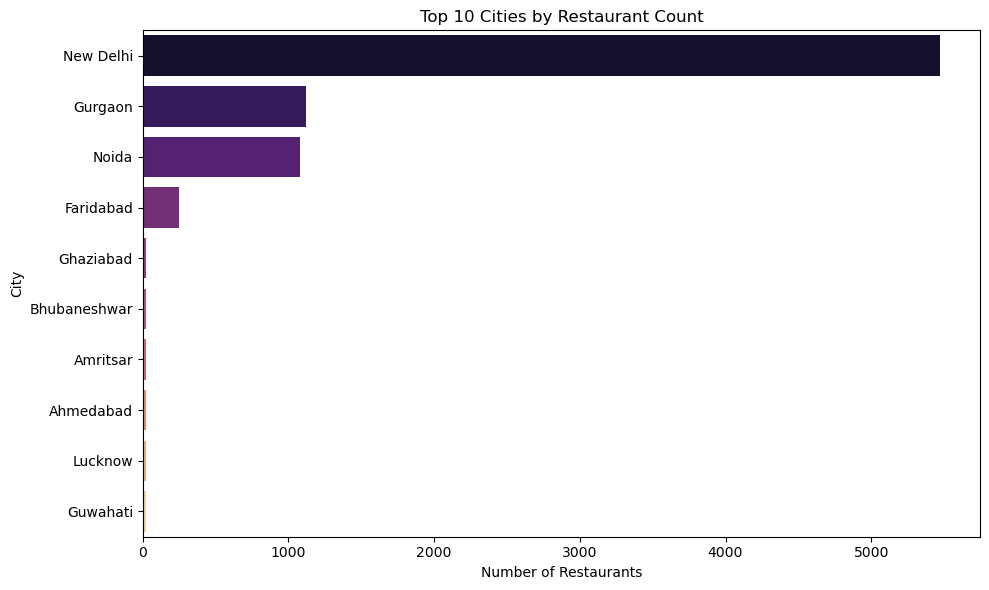

Top 5 cities by average rating
City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
Name: Aggregate rating, dtype: float64


In [ ]:
# Task 2: City with the most restaurants and highest average rating, plus a bar chart of top cities by count
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_dataset3=pd.read_csv('OneDrive/Desktop/jupyter/Dataset  (1).csv')
# City with most restaurants
city_counts = df_dataset3['City'].value_counts(dropna=False)
city_most = city_counts.idxmax()

# Highest average rating by city (filter out missing/zero ratings if present)
df_ratings = df_dataset3.copy()
df_ratings['Aggregate rating'] = pd.to_numeric(df_ratings['Aggregate rating'], errors='coerce')
city_avg = df_ratings.groupby('City', dropna=False)['Aggregate rating'].mean().sort_values(ascending=False)
city_highest_avg = city_avg.index[0]

# Show brief outputs
print('Identified city with most restaurants')
print(city_most)
print('Identified city with highest average rating')
print(city_highest_avg)

# Plot: Top 10 cities by restaurant count
top_n = 10
plt.figure(figsize=(10,6))
#sns.barplot(x=city_counts.head(top_n).values, y=city_counts.head(top_n).index, palette='magma')
sns.barplot(x=city_counts.head(top_n).values,y=city_counts.head(top_n).index,hue=city_counts.head(top_n).index,palette='magma',dodge=False,legend=False)
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.title('Top ' + str(top_n) + ' Cities by Restaurant Count')
plt.tight_layout()
plt.show()

# Also print top 5 cities by average rating
print('Top 5 cities by average rating')
print(city_avg.head(5))

Computed price range distribution and percentages

Counts by price range 

Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

 Percentages by price range

Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: count, dtype: float64


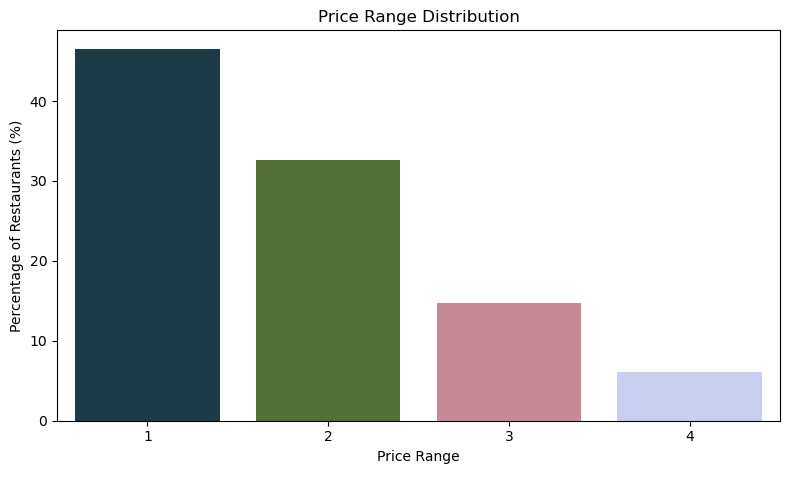

In [ ]:
# Task 3: Visualize price range distribution and compute percentages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_dataset3=pd.read_csv('OneDrive/Desktop/jupyter/Dataset  (1).csv')
price_series = pd.to_numeric(df_dataset3['Price range'], errors='coerce')
price_counts = price_series.value_counts(dropna=False).sort_index()

total_restaurants = len(df_dataset3)
percentages = (price_counts / total_restaurants) * 100

print('Computed price range distribution and percentages\n')
print('Counts by price range \n')
print(price_counts)
print('\n Percentages by price range\n')
print(percentages)

plt.figure(figsize=(8,5))
sns.barplot(x=price_counts.index.astype(str), y=percentages.values,hue=price_counts.index.astype(str), palette='cubehelix',legend=False)
plt.xlabel('Price Range\n')
plt.ylabel('Percentage of Restaurants (%)')
plt.title('Price Range Distribution')
plt.tight_layout()
plt.show()

In [ ]:

#LEVEL1 TASK4
import pandas as pd

# Inspect available columns
print('\n Available columns in df_dataset3:')
print(list(df_dataset3.columns))

# Try common variants for the online delivery column
candidate_cols = ['Online delivery', 'Online Delivery', 'Has Online delivery', 'Has Online Delivery', 'Has Online Delivery?', 'Has Online Delivery ?']
found_col = None
for c in candidate_cols:
    if c in df_dataset3.columns:
        found_col = c
        break

print('\nDetected online delivery column:',found_col)

# Try common variants for aggregate rating
rating_candidates = ['Aggregate rating', 'Aggregate Rating', 'Rating', 'rating']
rating_col = None
for c in rating_candidates:
    if c in df_dataset3.columns:
        rating_col = c
        break

print('\nDetected rating column:',rating_col)
# If columns are found, compute outputs
if found_col is not None and rating_col is not None:
    df_od = df_dataset3.copy()
    df_od[rating_col] = pd.to_numeric(df_od[rating_col], errors='coerce')

    online_vals = df_od[found_col].astype(str).str.strip().str.lower()
    has_delivery = online_vals.isin(['yes', 'true', '1'])

    pct_delivery = has_delivery.mean() * 100
    avg_with = df_od.loc[has_delivery, rating_col].mean()
    avg_without = df_od.loc[~has_delivery, rating_col].mean()

    print('\nComputed online delivery share and rating comparison')
    print('\nPercentage Online Delivery (%):',pct_delivery)
    print('\nAverage Rating With Delivery:',avg_with)
    print('\nAverage Rating Without Delivery:',avg_without)
else:
    print('Could not find required columns. Please provide the exact column names for online delivery and rating, or share a sample of df_dataset3.head().')


 Available columns in df_dataset3:
['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']

Detected online delivery column: Has Online delivery

Detected rating column: Aggregate rating

Computed online delivery share and rating comparison

Percentage Online Delivery (%): 25.662234321013504

Average Rating With Delivery: 3.2488372093023257

Average Rating Without Delivery: 2.465295774647887


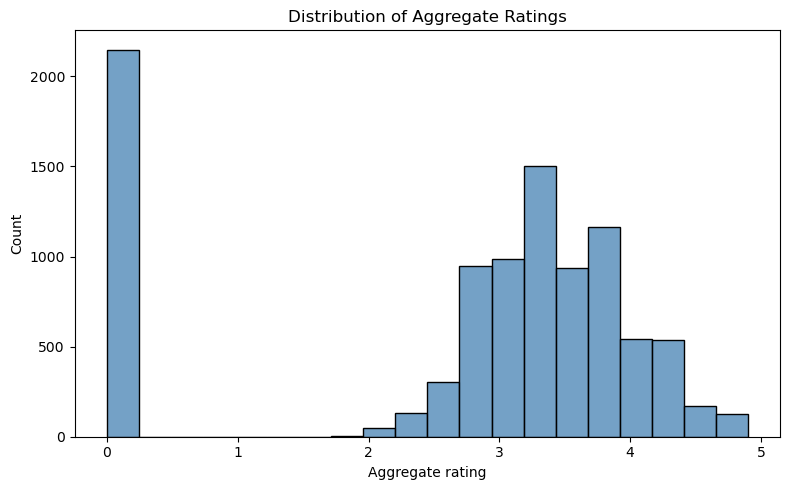

Computed histogram for ratings and calculated summary stats
Most common rating range: [3.0, 3.5)
Average votes: 156.909747670401


In [ ]:
#LEVEL2 COGNIFY TASKS
# Task 1: Ratings distribution and average votes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Using df_dataset3; columns expected: 'Aggregate rating', 'Votes'
ratings = pd.to_numeric(df_dataset3['Aggregate rating'], errors='coerce')
votes = pd.to_numeric(df_dataset3['Votes'], errors='coerce')

# Histogram of ratings
plt.figure(figsize=(8,5))
sns.histplot(ratings.dropna(), bins=20, kde=False, color='steelblue')
plt.xlabel('Aggregate rating')
plt.ylabel('Count')
plt.title('Distribution of Aggregate Ratings')
plt.tight_layout()
plt.show()

# Most common rating bin
bins = pd.interval_range(start=0, end=5, freq=0.5, closed='left')
cat = pd.cut(ratings, bins)
mode_bin = cat.value_counts().idxmax()

avg_votes = votes.mean()

print('Computed histogram for ratings and calculated summary stats')
print('Most common rating range:',str(mode_bin))
print('Average votes:',avg_votes)


In [ ]:
#TASK2
import pandas as pd
from tabulate import tabulate

def print_dark_table(df, title, max_rows=10):
    df = df.head(max_rows)
    print(f"\n{title}\n")
    print(tabulate(df, headers="keys", tablefmt="fancy_grid", showindex=False))

def print_dark_table_from_series(ser, title, max_rows=10):
    df_tmp = ser.reset_index()
    df_tmp.columns = ["cuisine_combo", "count"]
    print_dark_table(df_tmp, title, max_rows)

pd.set_option("display.max_colwidth", 80)

# Prepare data
df_c = df_dataset3[["Cuisines", "Aggregate rating"]].copy()
df_c["Aggregate rating"] = pd.to_numeric(df_c["Aggregate rating"], errors="coerce")

# Extract and clean cuisine combinations
combos = df_c["Cuisines"].astype(str).str.split(",")
combos = combos.apply(lambda lst: tuple([x.strip() for x in lst if x.strip() != ""]))
df_c["cuisine_combo"] = combos

# Count top combinations
combo_counts = df_c["cuisine_combo"].value_counts().head(10)

# Compute stats for combinations with at least 5 occurrences
combo_stats = (
    df_c.groupby("cuisine_combo")
    .agg(count=("cuisine_combo", "size"), avg_rating=("Aggregate rating", "mean"))
    .reset_index())
combo_stats = combo_stats[combo_stats["count"] >= 5].sort_values(
    ["avg_rating", "count"], ascending=[False, False]).head(10)

# Display results
print("\nComputed cuisine combination frequency and top-rated combos (min 5)")
print_dark_table_from_series(combo_counts, "Top 10 Most Common Cuisine Combos")
print_dark_table(combo_stats, "Top 10 Highest-Rated Cuisine Combos (min 5)")



Computed cuisine combination frequency and top-rated combos (min 5)

Top 10 Most Common Cuisine Combos

╒════════════════════════════════════════╤═════════╕
│ cuisine_combo                          │   count │
╞════════════════════════════════════════╪═════════╡
│ ('North Indian',)                      │     936 │
├────────────────────────────────────────┼─────────┤
│ ('North Indian', 'Chinese')            │     511 │
├────────────────────────────────────────┼─────────┤
│ ('Chinese',)                           │     354 │
├────────────────────────────────────────┼─────────┤
│ ('Fast Food',)                         │     354 │
├────────────────────────────────────────┼─────────┤
│ ('North Indian', 'Mughlai')            │     334 │
├────────────────────────────────────────┼─────────┤
│ ('Cafe',)                              │     299 │
├────────────────────────────────────────┼─────────┤
│ ('Bakery',)                            │     218 │
├────────────────────────────────────────┼─────

In [ ]:
!pip install geopandas


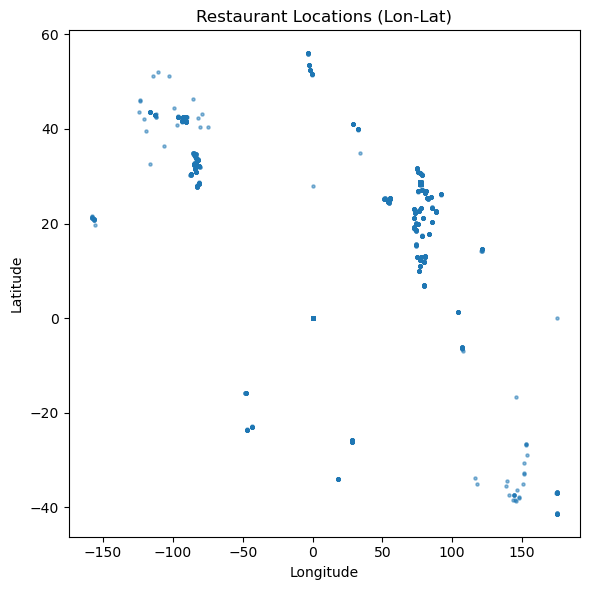

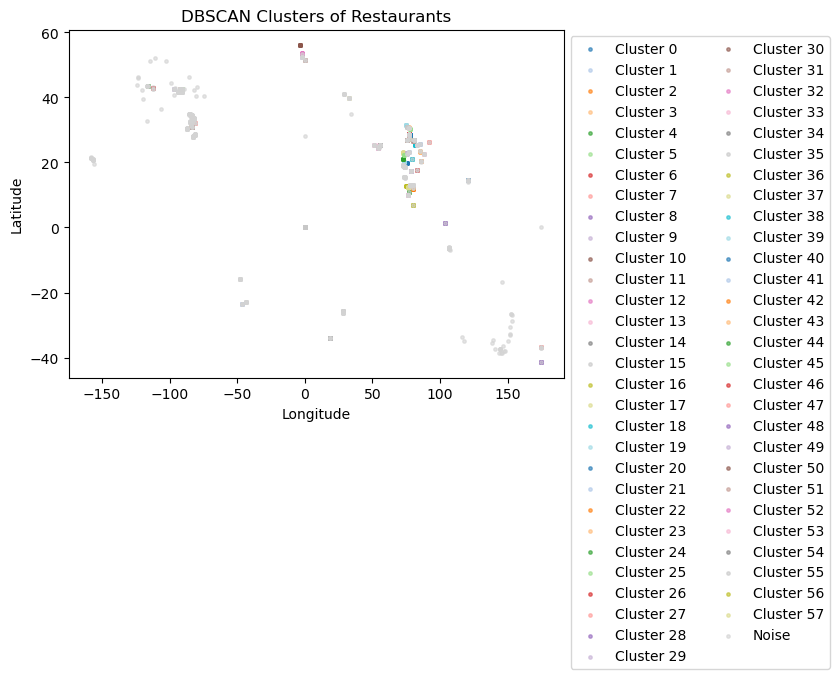

Plotted lon-lat scatter and DBSCAN cluster visualization
Number of clusters (excluding noise)
58


In [ ]:
# Task 3: Geographic Analysis - map and clusters
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Prepare GeoDataFrame
coords = df_dataset3[['Longitude','Latitude']].copy()
coords = coords.dropna()
coords = coords[(coords['Longitude'].between(-180,180)) & (coords['Latitude'].between(-90,90))]

# Plot scatter map (plain lat-long)
plt.figure(figsize=(6,6))
plt.scatter(coords['Longitude'], coords['Latitude'], s=5, alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Restaurant Locations (Lon-Lat)')
plt.tight_layout()
plt.show()

# Cluster with DBSCAN on scaled degrees (approx for lat-lon)
X = coords[['Longitude','Latitude']].values
# eps in degrees (~0.01 deg ~ 1.1 km at equator); may vary by dataset density
clust = DBSCAN(eps=0.03, min_samples=10).fit(X)
labels = clust.labels_

# Plot clusters (noise label -1)
plt.figure(figsize=(10,6))
unique = set(labels)
colors = plt.cm.tab20.colors
for idx, lab in enumerate(unique):
    mask = labels == lab
    c = 'lightgray' if lab == -1 else colors[idx % len(colors)]
    plt.scatter(X[mask,0], X[mask,1], s=6, alpha=0.6, color=c, label=('Noise' if lab == -1 else 'Cluster ' + str(lab)))
plt.subplots_adjust(top=0.88, bottom=0.15)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('DBSCAN Clusters of Restaurants')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2)

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Shrink plot area to make space for legend

plt.show()

print('Plotted lon-lat scatter and DBSCAN cluster visualization')
print('Number of clusters (excluding noise)')
print(len([l for l in set(labels) if l != -1]))


Identified chains (names with 3 or more locations) and computed stats


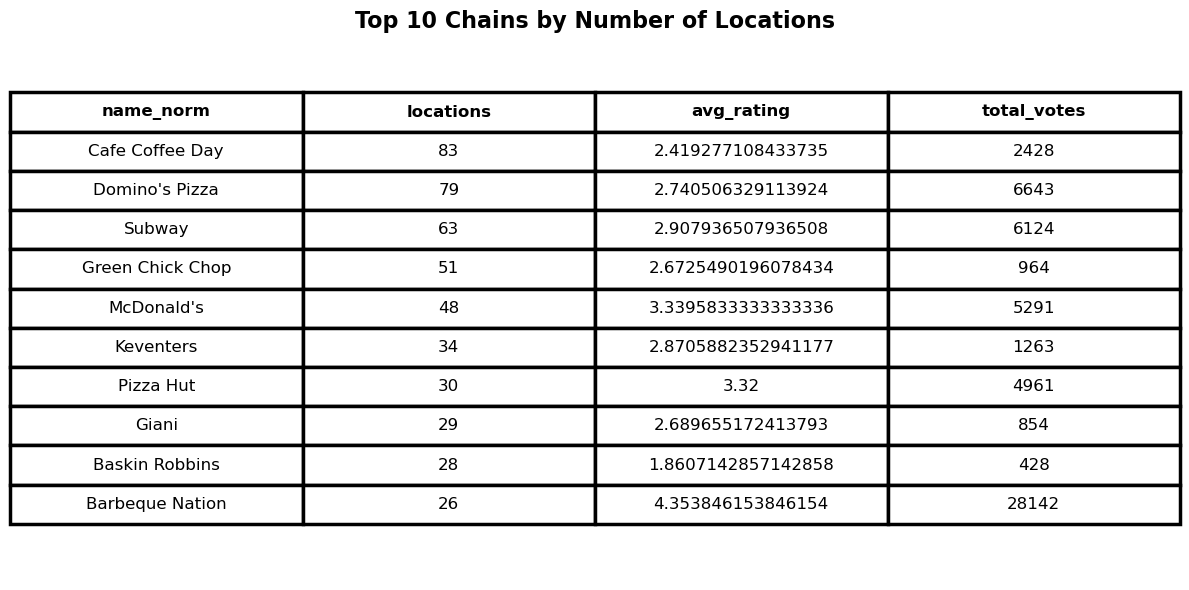

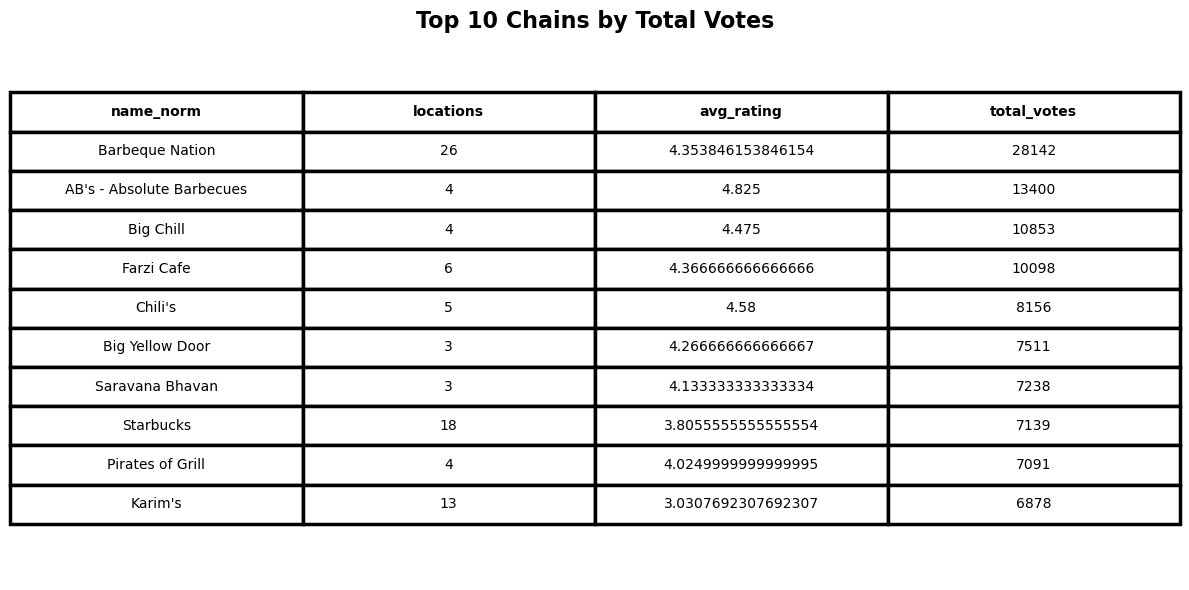

In [ ]:
#TASK4
import pandas as pd
import matplotlib.pyplot as plt

def plot_thick_bordered_table(df, title, max_rows=10):
    df = df.head(max_rows)
    fig, ax = plt.subplots(figsize=(12, 0.6 * len(df)))
    ax.axis('off')

    table = ax.table(
        cellText=df.values,
        colLabels=df.columns,
        loc='center',
        cellLoc='center')

    table.scale(1, 2)

    for key, cell in table.get_celld().items():
        cell.set_linewidth(2.5)
        cell.set_edgecolor("black")
        cell.set_fontsize(12)
        if key[0] == 0:
            cell.set_text_props(weight='bold')

    plt.title(title, fontsize=16, weight='bold')
    plt.tight_layout()
    plt.show()

# Task 4: Restaurant Chains - identify chains and analyze ratings/popularity
df_chain = df_dataset3[['Restaurant Name','Aggregate rating','Votes']].copy()
df_chain['Aggregate rating'] = pd.to_numeric(df_chain['Aggregate rating'], errors='coerce')
df_chain['Votes'] = pd.to_numeric(df_chain['Votes'], errors='coerce')

df_chain['name_norm'] = df_chain['Restaurant Name'].astype(str).str.strip().str.replace(r'\s+', ' ', regex=True)

chain_stats = df_chain.groupby('name_norm').agg(
    locations=('name_norm','size'),
    avg_rating=('Aggregate rating','mean'),
    total_votes=('Votes','sum')
).reset_index()

chains = chain_stats[chain_stats['locations'] >= 3].sort_values(['locations','total_votes'], ascending=[False, False])

top_by_locations = chains.head(10)
top_by_votes = chains.sort_values('total_votes', ascending=False).head(10)

# Display results with thick-bordered tables
print("\nIdentified chains (names with 3 or more locations) and computed stats")
plot_thick_bordered_table(top_by_locations, "Top 10 Chains by Number of Locations")
plot_thick_bordered_table(top_by_votes, "Top 10 Chains by Total Votes")
